In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
file_path = r"C:\Users\donga\Downloads\Amazon Sale Report (1).csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataframe
print(df.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [ ]:
# Display information about the dataframe
print(df.info())

In [11]:
unique_dates = df['Date'].unique()
unique_dates[:20]

array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
       '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
       '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
       '04-15-22', '04-14-22', '04-13-22', '04-12-2022', '04-11-2022'],
      dtype=object)

In [12]:
#SALES OVERVIEW

In [13]:
#Convert Date Format

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')
print(df['Date'].head())  # Verify the conversion

0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
Name: Date, dtype: datetime64[ns]


In [15]:
date_errors = df[df['Date'].isnull()]
print(date_errors)  # Inspect rows with date conversion errors

         index             Order ID Date                        Status  \
29926    29925  405-6163095-9509124  NaT                       Shipped   
29927    29926  403-2229855-3541155  NaT                       Shipped   
29928    29927  171-1029312-3038738  NaT  Shipped - Delivered to Buyer   
29929    29928  408-5086595-1206718  NaT  Shipped - Delivered to Buyer   
29930    29929  405-2183842-2225946  NaT                       Shipped   
...        ...                  ...  ...                           ...   
128879  128878  171-0210562-5575545  NaT                       Shipped   
128880  128879  405-1423498-9705162  NaT                       Shipped   
128881  128880  403-6638920-0842712  NaT                       Shipped   
128882  128881  408-4694875-8249153  NaT                       Shipped   
128883  128882  403-6755613-0102753  NaT                       Shipped   

       Fulfilment Sales Channel ship-service-level  Category Size  \
29926      Amazon     Amazon.in          E

In [16]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [17]:
df = df.dropna(subset=['Date'])  # Drop rows where date conversion failed

In [18]:
df['YearMonth'] = df['Date'].dt.to_period('M')

In [19]:
monthly_sales = df.groupby('YearMonth').agg(
    total_sales=('Amount', 'sum'),
    order_volume=('Order ID', 'count')
).reset_index()
monthly_sales

,YearMonth,total_sales,order_volume
0,2022-03,101683.85,171
1,2022-04,17513687.51,30114
2,2022-05,14987650.07,23512
3,2022-06,12510618.36,20070


In [21]:
#Plot Total Sales Over Time

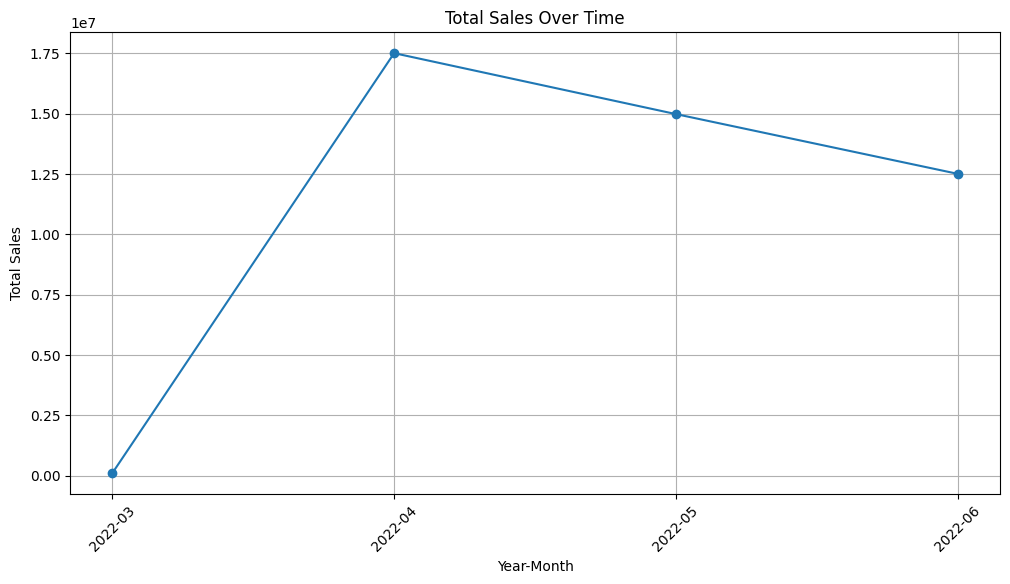

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['total_sales'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [23]:
#Plot Order Volume Over Time

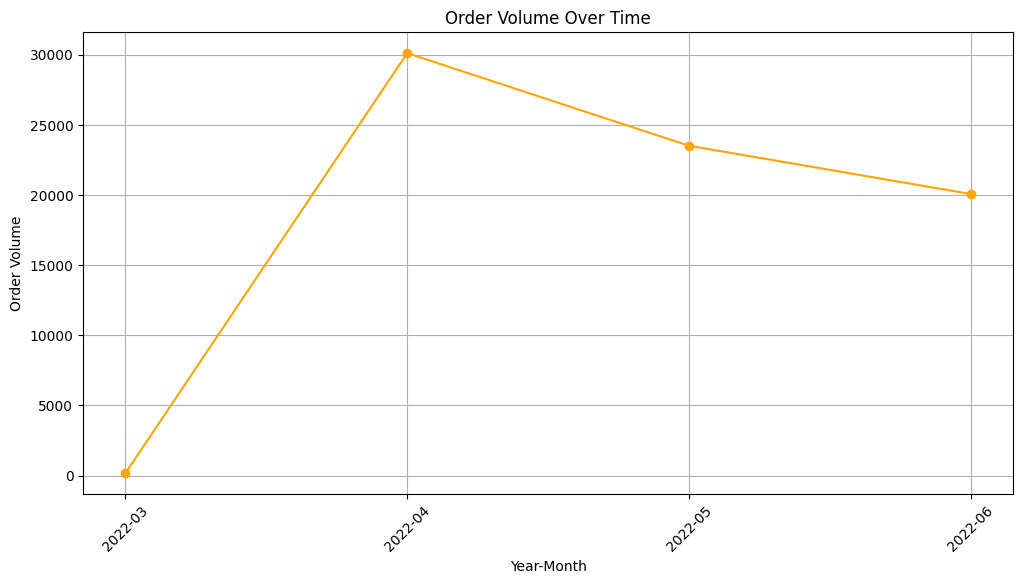

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['order_volume'], marker='o', color='orange')
plt.title('Order Volume Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Order Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [25]:
#Analyze Sales by Product Category

In [26]:
category_sales = df.groupby('Category').agg(
    total_sales=('Amount', 'sum'),
    order_volume=('Order ID', 'count')
).reset_index()

In [27]:
top_categories = category_sales.sort_values(by='total_sales', ascending=False).head(10)
print(top_categories)

   Category  total_sales  order_volume
5   T-shirt  22234185.56         28421
2     Shirt  12084290.30         28183
0   Blazzer   6743046.39          9371
6  Trousers   3138770.16          6250
1   Perfume    455492.74           653
7    Wallet    273286.86           572
4     Socks    110982.54           316
3     Shoes     72670.24            98
8     Watch       915.00             3


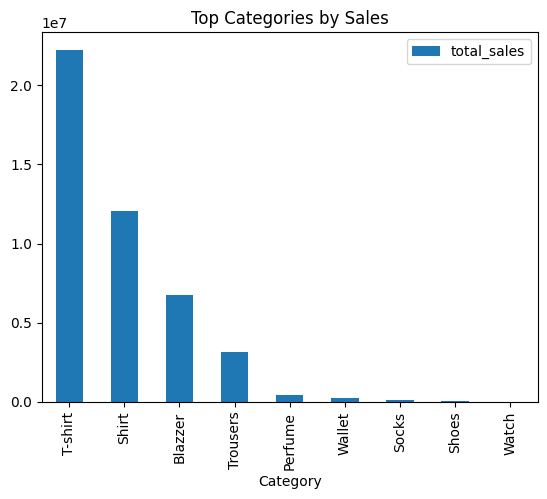

In [28]:
top_categories.plot(kind='bar', x='Category', y='total_sales', title='Top Categories by Sales')
plt.show()

In [29]:
df['Status'].value_counts()

Status
Shipped                          42863
Shipped - Delivered to Buyer     17295
Cancelled                        10457
Shipped - Returned to Seller      1167
Shipped - Picked Up                961
Pending                            653
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      134
Shipped - Out for Delivery          35
Shipping                             8
Shipped - Rejected by Buyer          7
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [30]:
status_distribution = df['Status'].value_counts(normalize=True)*100
print(status_distribution)

Status
Shipped                          58.027265
Shipped - Delivered to Buyer     23.413703
Cancelled                        14.156525
Shipped - Returned to Seller      1.579867
Shipped - Picked Up               1.300987
Pending                           0.884021
Pending - Waiting for Pick Up     0.380413
Shipped - Returning to Seller     0.181407
Shipped - Out for Delivery        0.047382
Shipping                          0.010830
Shipped - Rejected by Buyer       0.009476
Shipped - Lost in Transit         0.006769
Shipped - Damaged                 0.001354
Name: proportion, dtype: float64


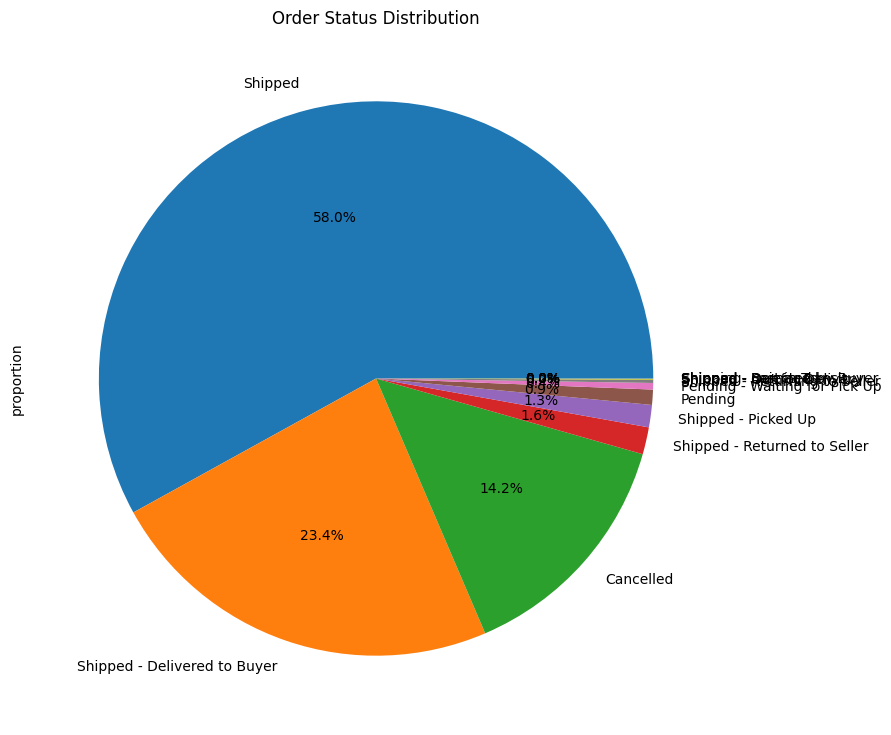

In [31]:
plt.figure(figsize=(9,9))
status_distribution.plot(kind='pie', autopct='%1.1f%%', title='Order Status Distribution')
plt.show()

In [32]:
#Product Analysis

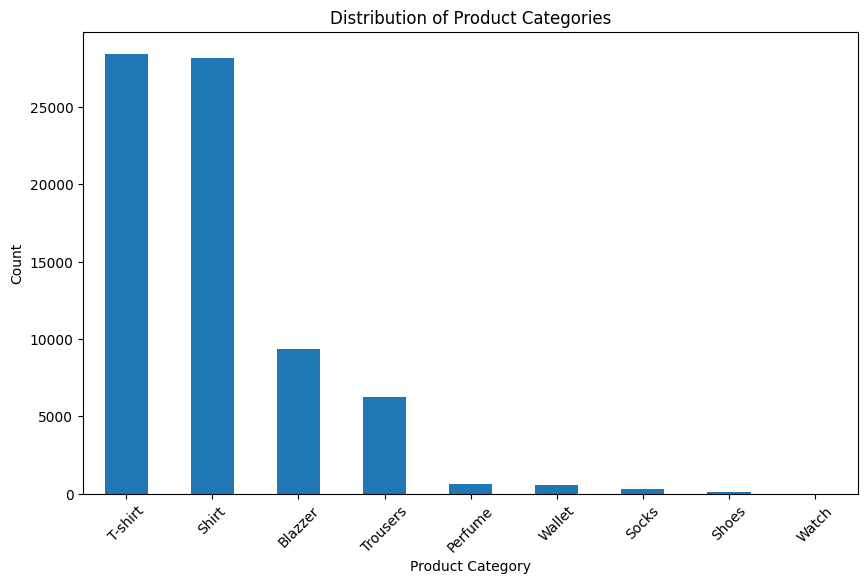

In [33]:
# Analyze the distribution of product categories
category_distribution = df['Category'].value_counts()

# Plot the distribution of product categories
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


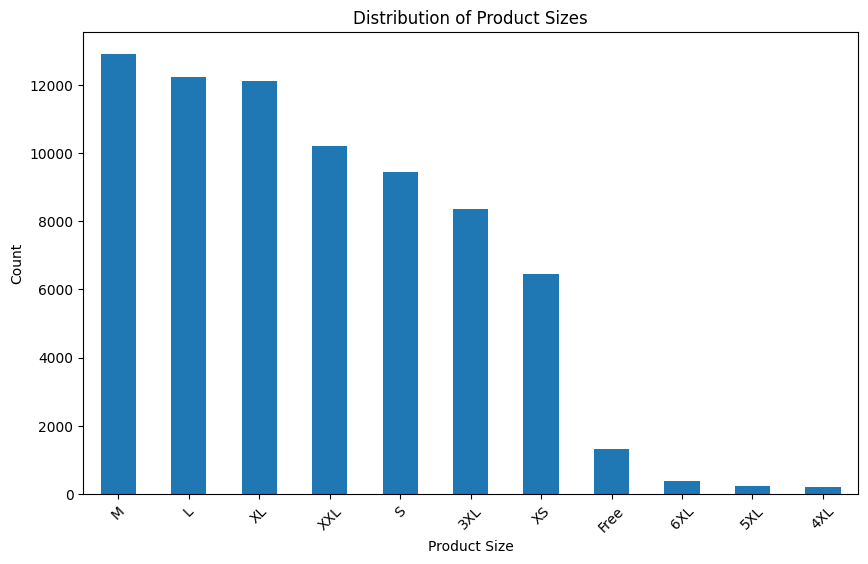

In [34]:
# Analyze the distribution of product sizes
size_distribution = df['Size'].value_counts()

# Plot the distribution of product sizes
plt.figure(figsize=(10, 6))
size_distribution.plot(kind='bar')
plt.title('Distribution of Product Sizes')
plt.xlabel('Product Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

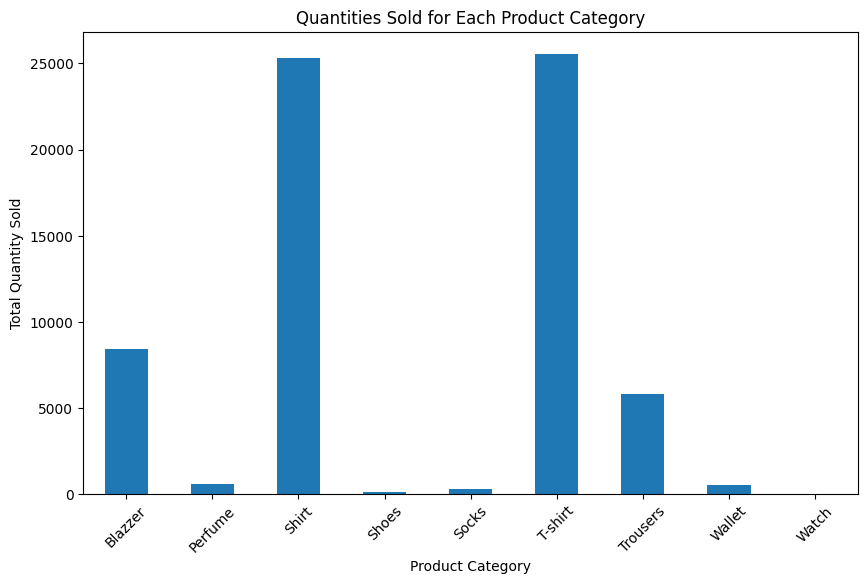

In [35]:
# Assuming 'Quantity' is the correct column for quantities sold
# If the column name is different, replace 'Quantity' with the correct column name
category_quantity = df.groupby('Category')['Qty'].sum()

# Plot the quantities sold for each product category
plt.figure(figsize=(10, 6))
category_quantity.plot(kind='bar')
plt.title('Quantities Sold for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

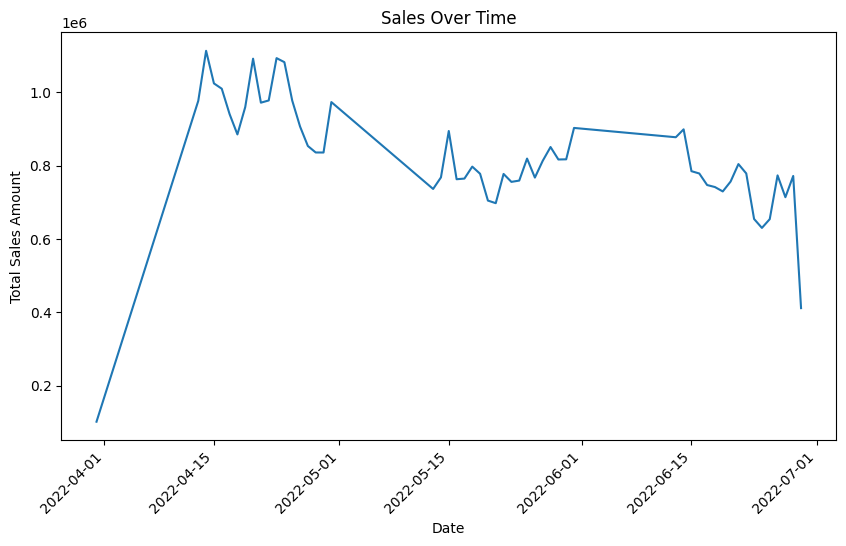

In [36]:
# Sales by date to identify trends over time
df['Date'] = pd.to_datetime(df['Date'])
sales_by_date = df.groupby('Date')['Amount'].sum()

# Plot sales by date
plt.figure(figsize=(10, 6))
sales_by_date.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

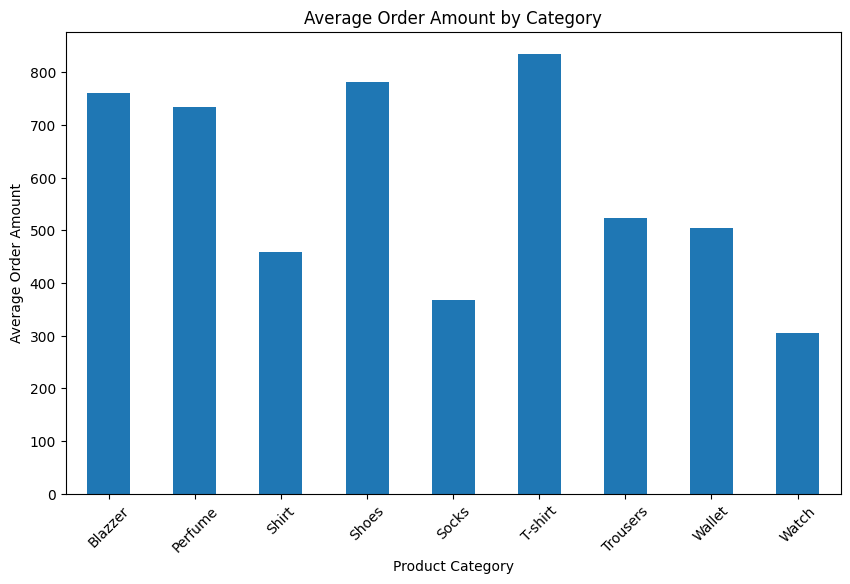

In [37]:
# Average order amount by category
average_order_amount_by_category = df.groupby('Category')['Amount'].mean()

# Plot average order amount by category
plt.figure(figsize=(10, 6))
average_order_amount_by_category.plot(kind='bar')
plt.title('Average Order Amount by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Order Amount')
plt.xticks(rotation=45)
plt.show()

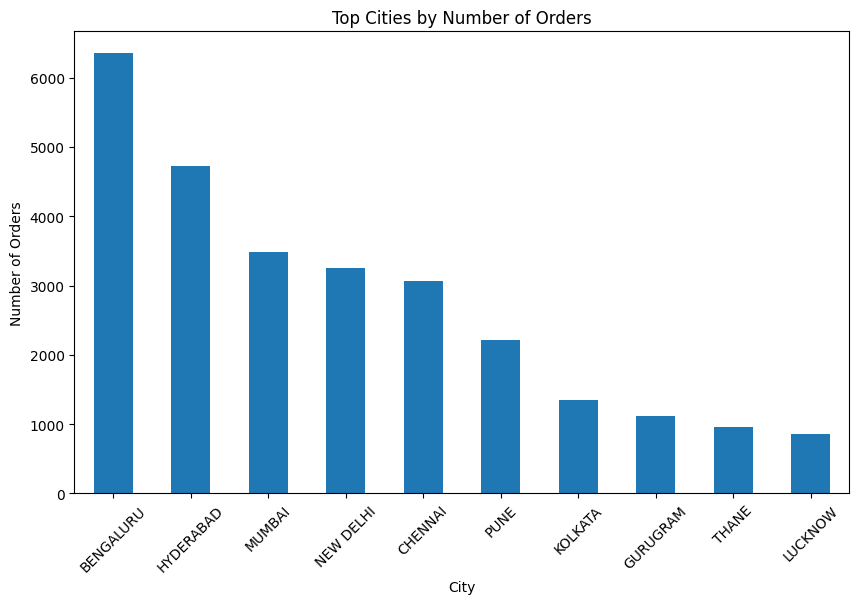

In [38]:
# Top cities by number of orders
top_cities = df['ship-city'].value_counts().head(10)

# Plot top cities by number of orders
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.title('Top Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


In [39]:
#Fullfillment Analysis

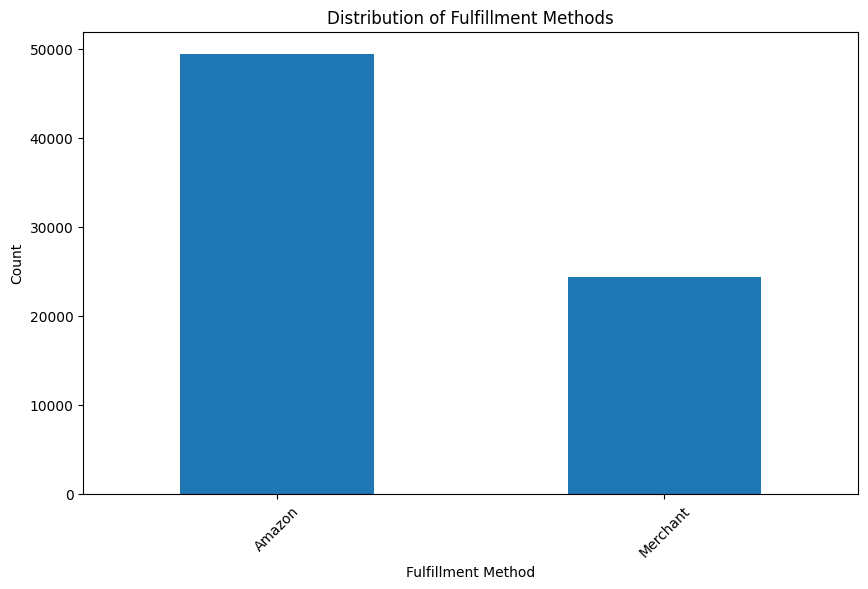

In [40]:
# Analysis of fulfillment methods
fulfillment_method_distribution = df['Fulfilment'].value_counts()

# Plot fulfillment method distribution
plt.figure(figsize=(10, 6))
fulfillment_method_distribution.plot(kind='bar')
plt.title('Distribution of Fulfillment Methods')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

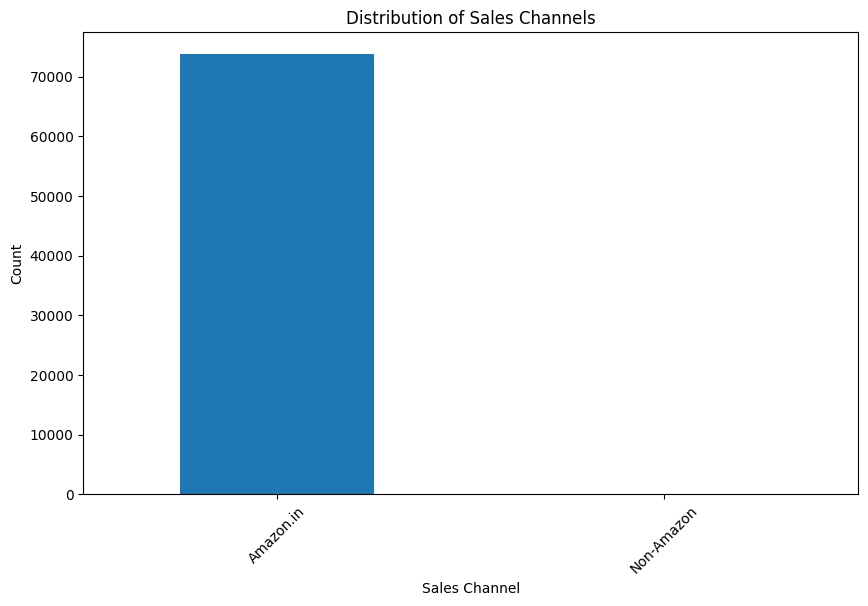

In [41]:
# Analysis of sales channels
sales_channel_distribution = df['Sales Channel'].value_counts()

# Plot sales channel distribution
plt.figure(figsize=(10, 6))
sales_channel_distribution.plot(kind='bar')
plt.title('Distribution of Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Analyze delivery status by fulfillment method
delivery_status_by_fulfillment = df.groupby(['Fulfilment', 'Status']).size().unstack(level=0)
delivery_status_by_fulfillment

Fulfilment,Amazon,Merchant
Status,,
Cancelled,6222.0,4235.0
Pending,410.0,243.0
Pending - Waiting for Pick Up,NaN,281.0
Shipped,42863.0,NaN
Shipped - Damaged,NaN,1.0
Shipped - Delivered to Buyer,NaN,17295.0
Shipped - Lost in Transit,NaN,5.0
Shipped - Out for Delivery,NaN,35.0
Shipped - Picked Up,NaN,961.0


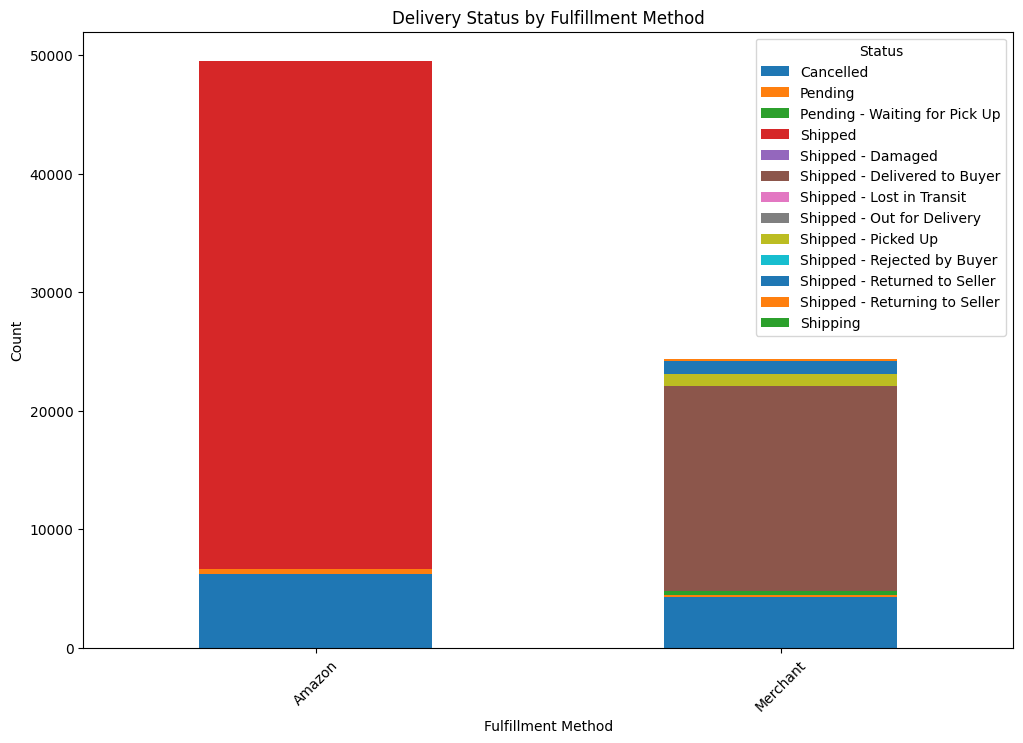

In [43]:
# Analyze delivery status by fulfillment method
delivery_status_by_fulfillment = df.groupby(['Fulfilment', 'Status']).size().unstack()

# Plot delivery status by fulfillment method
delivery_status_by_fulfillment.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Delivery Status by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

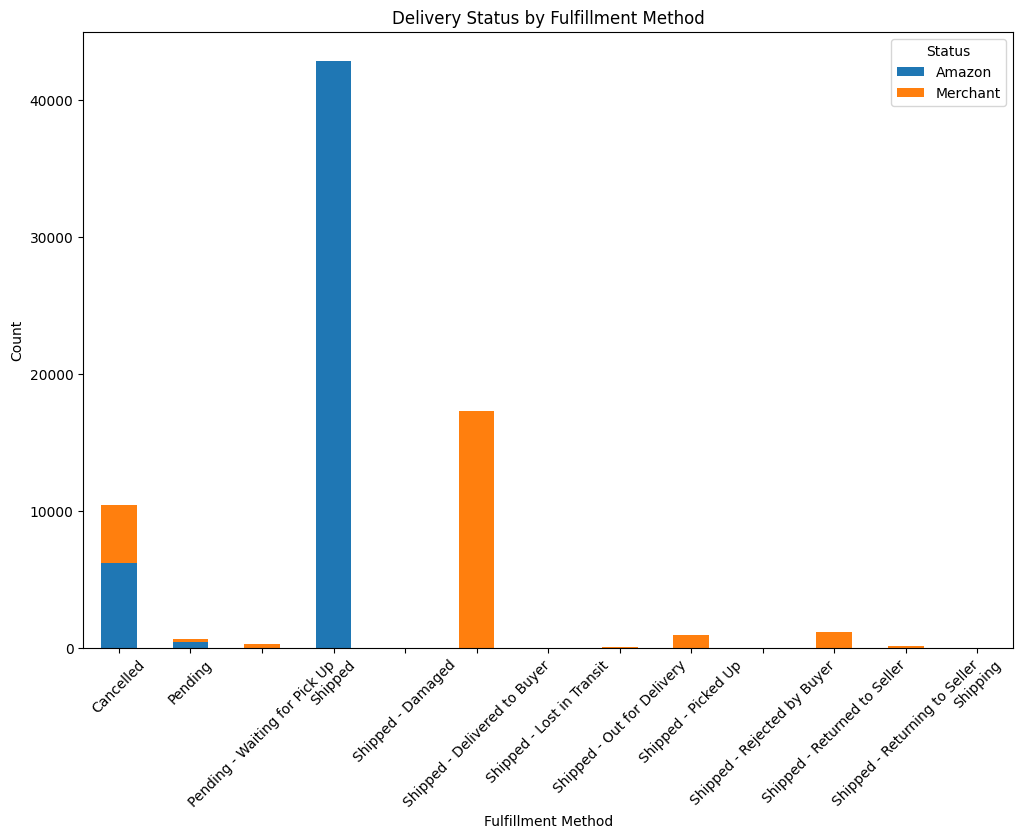

In [44]:
# Analyze delivery status by fulfillment method
delivery_status_by_fulfillment = df.groupby(['Fulfilment', 'Status']).size().unstack(level=0)

# Plot delivery status by fulfillment method
delivery_status_by_fulfillment.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Delivery Status by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

In [45]:
# Assuming the dataset has 'Order Date' and 'Delivery Date' columns to calculate delivery time
if 'Order Date' in df.columns and 'Delivery Date' in df.columns:
    # Convert dates to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])
    
    # Calculate delivery time in days
    df['Delivery Time (Days)'] = (df['Delivery Date'] - df['Order Date']).dt.days
    
    # Calculate average delivery time by fulfillment method
    avg_delivery_time_by_fulfillment = df.groupby('Fulfilment')['Delivery Time (Days)'].mean()
    
    # Plot average delivery time by fulfillment method
    plt.figure(figsize=(10, 6))
    avg_delivery_time_by_fulfillment.plot(kind='bar')
    plt.title('Average Delivery Time by Fulfillment Method')
    plt.xlabel('Fulfillment Method')
    plt.ylabel('Average Delivery Time (Days)')
    plt.xticks(rotation=45)
    plt.show()

In [46]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'YearMonth'],
      dtype='object')

In [50]:
#Customer Segmentation

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data preparation
# Assuming 'Customer ID' is the column identifying unique customers
# Calculate total spending, order frequency, and average order value for each customer
customer_data = df.groupby('Order ID').agg({
    'Amount': ['sum', 'count', 'mean'],
    'ship-city': 'first',  # Assuming each customer is associated with one city
    'ship-state': 'first'  # Assuming each customer is associated with one state
}).reset_index()

In [53]:
customer_data

Order ID  Amount                ship-city   ship-state
                               sum count    mean      first        first
0      171-0005637-8167567   579.0     1   579.0  NEW DELHI        DELHI
1      171-0005741-2261112   558.0     1   558.0  HYDERABAD    TELANGANA
2      171-0005999-3189913  1115.0     1  1115.0    patiala       punjab
3      171-0006482-2020369   368.0     1   368.0     HALDIA  WEST BENGAL
4      171-0007212-7125106  1092.0     1  1092.0     MUMBAI  MAHARASHTRA
...                    ...     ...   ...     ...        ...          ...
68776  S02-9542567-5952341     0.0     0     NaN      Surat      Gujarat
68777  S02-9578181-3610412     0.0     0     NaN      Surat      Gujarat
68778  S02-9599483-2736812     0.0     0     NaN      Surat      Gujarat
68779  S02-9649067-3246849     0.0     0     NaN      Surat      Gujarat
68780  S02-9736323-0094708     0.0     0     NaN      Surat      Gujarat

[68781 rows x 6 columns]

In [54]:
# Rename columns for easier access
customer_data.columns = ['Customer ID', 'Total Spending', 'Order Frequency', 'Average Order Value', 'City', 'State']

# Feature selection
features = customer_data[['Total Spending', 'Order Frequency', 'Average Order Value']]
features = pd.get_dummies(features)
features.shape

(68781, 3)

In [55]:
features

,Total Spending,Order Frequency,Average Order Value
0,579.0,1,579.0
1,558.0,1,558.0
2,1115.0,1,1115.0
3,368.0,1,368.0
4,1092.0,1,1092.0
...,...,...,...
68776,0.0,0,NaN
68777,0.0,0,NaN
68778,0.0,0,NaN
68779,0.0,0,NaN


In [56]:
a = range(1, 202141)
for i in a:
    if 202141 % i == 0:
        print(i)

1
19
10639


In [57]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = features_scaled[~np.isnan(features_scaled)]

In [58]:
features_scaled

array([-0.19455493, -0.02203766, -0.25899994, ..., -2.40908011,
       -1.65935897, -2.40908011], shape=(202141,))

In [59]:
features_scaled.shape

(202141,)

In [60]:
features_scaled1=features_scaled.reshape(10639,19)

In [61]:
features_scaled

array([-0.19455493, -0.02203766, -0.25899994, ..., -2.40908011,
       -1.65935897, -2.40908011], shape=(202141,))

In [62]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features_scaled1)
    inertia.append(kmeans.inertia_)

In [63]:
inertia

[202127.77669371472,
 189720.46164462744,
 181588.5168375798,
 175408.56520039967,
 170487.28564048078,
 166515.865654459,
 163220.93808240886,
 160787.72851725237,
 157416.18623445102,
 155308.08881760924]

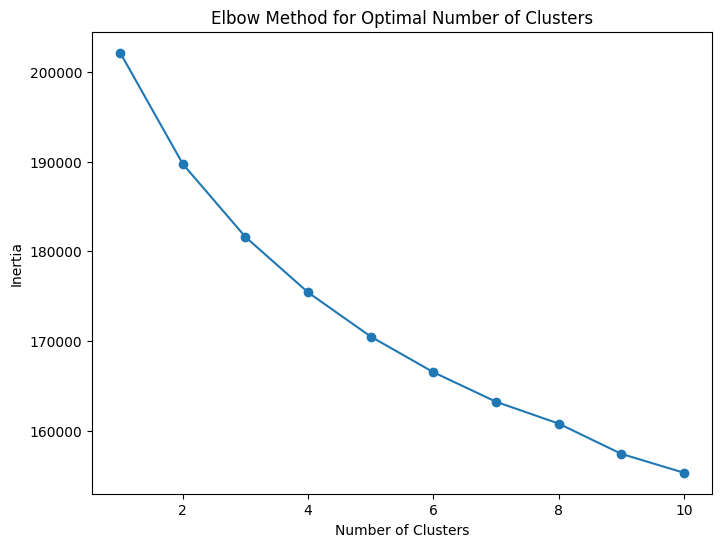

In [64]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [65]:
# Assuming the optimal number of the clusters is 4 (based on the Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans = kmeans.fit(features_scaled1)
kmeans = kmeans.fit_predict(features_scaled1)
kmeans

array([2, 2, 1, ..., 0, 0, 0], shape=(10639,), dtype=int32)

In [66]:
customer_data

,Customer ID,Total Spending,Order Frequency,Average Order Value,City,State
0,171-0005637-8167567,579.0,1,579.0,NEW DELHI,DELHI
1,171-0005741-2261112,558.0,1,558.0,HYDERABAD,TELANGANA
2,171-0005999-3189913,1115.0,1,1115.0,patiala,punjab
3,171-0006482-2020369,368.0,1,368.0,HALDIA,WEST BENGAL
4,171-0007212-7125106,1092.0,1,1092.0,MUMBAI,MAHARASHTRA
...,...,...,...,...,...,...
68776,S02-9542567-5952341,0.0,0,NaN,Surat,Gujarat
68777,S02-9578181-3610412,0.0,0,NaN,Surat,Gujarat
68778,S02-9599483-2736812,0.0,0,NaN,Surat,Gujarat
68779,S02-9649067-3246849,0.0,0,NaN,Surat,Gujarat


In [67]:
# Check the lengths of features and features_scaled
print(f"Length of features: {len(features)}")
print(f"Length of features_scaled: {len(features_scaled)}")

Length of features: 68781
Length of features_scaled: 202141


In [68]:
#Geographical Analysis: Explore the geographical distribu􀆟on of sales, focusing on states and cities.

In [69]:
# Data preparation
# Ensure there are no missing values in the 'ship-city', 'ship-state', and 'Amount' columns
data = df.dropna(subset=['ship-city', 'ship-state', 'Amount'])

In [70]:
# Aggregate sales data by state
state_sales = data.groupby('ship-state')['Amount'].sum().reset_index()
state_sales

,ship-state,Amount
0,ANDAMAN & NICOBAR,91090.29
1,ANDHRA PRADESH,1840251.35
2,AR,493.00
3,ARUNACHAL PRADESH,50848.38
4,ASSAM,574803.66
5,BIHAR,822580.16
6,Bihar,11210.00
7,CHANDIGARH,123669.48
8,CHHATTISGARH,339615.76
9,Chandigarh,5377.62


In [71]:
state_sales.columns = ['State', 'Total Sales']

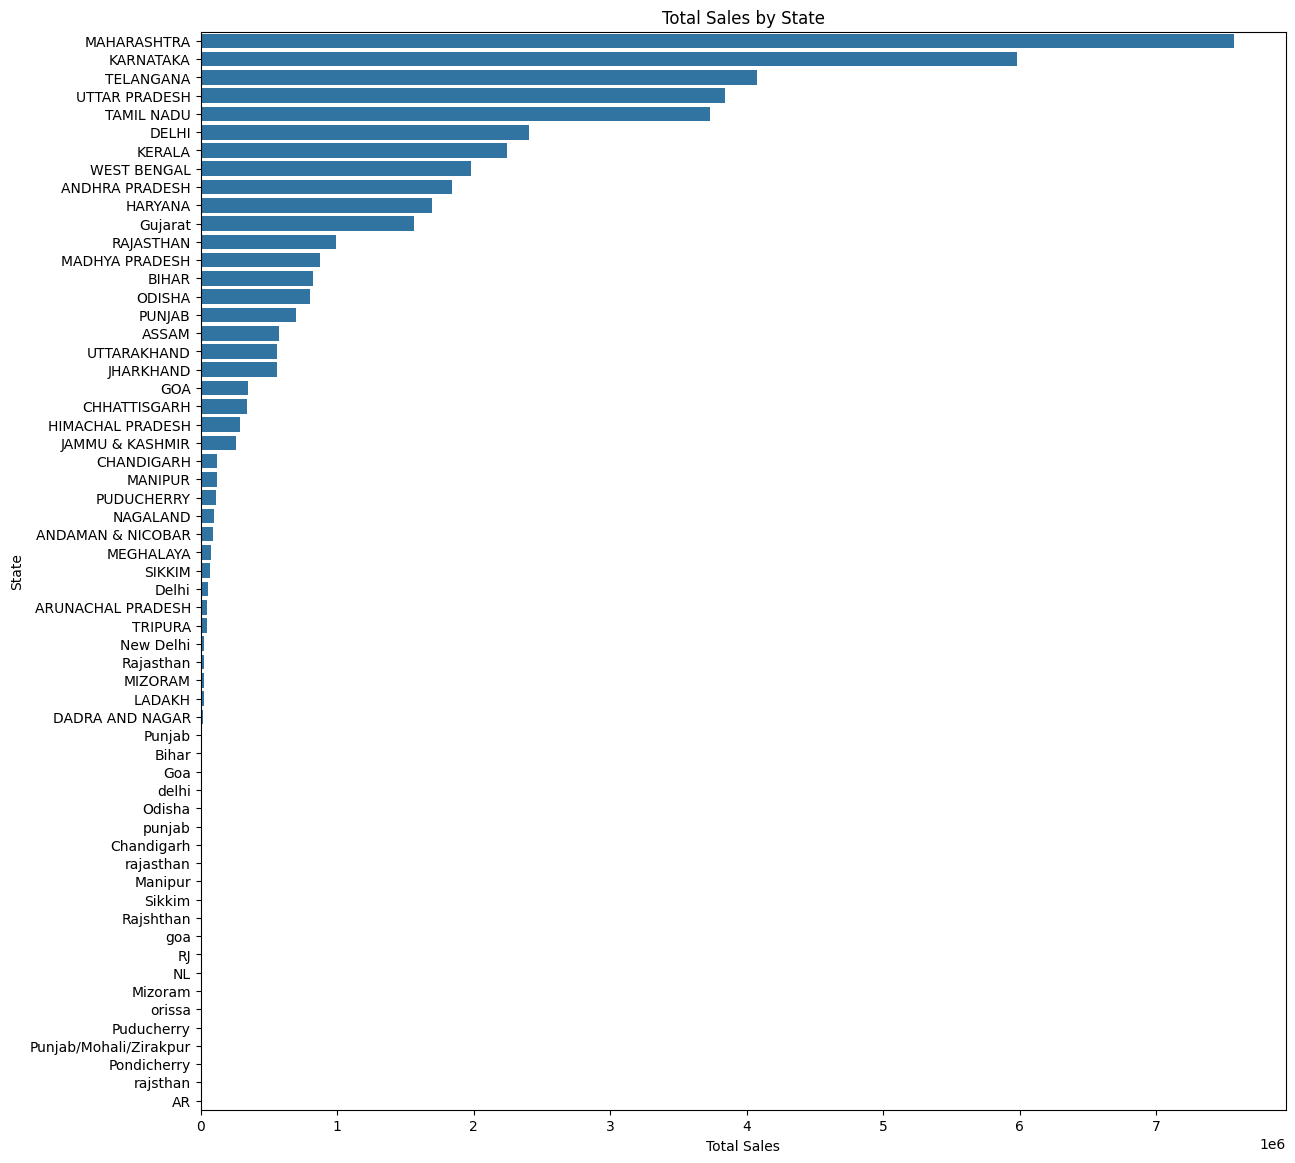

In [73]:
# Plot total sales by state
plt.figure(figsize=(14, 14))
sns.barplot(x='Total Sales', y='State', data=state_sales.sort_values('Total Sales', ascending=False))
plt.title('Total Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

In [74]:
# Aggregate sales data by city
city_sales = data.groupby('ship-city')['Amount'].sum().reset_index()
city_sales.columns = ['City', 'Total Sales']

In [75]:
city_sales

,City,Total Sales
0,"(Via Cuncolim)Quepem,South Goa",1163.00
1,",HYDERABAD",563.00
2,.Gannavaram,832.00
3,.azamgarh,949.00
4,147/19 B Keshab Chandra Sen Street Kolkata nin...,414.29
...,...,...
6294,yavatmal,735.00
6295,yazali,487.00
6296,yellapur,824.00
6297,zirakpur,852.00


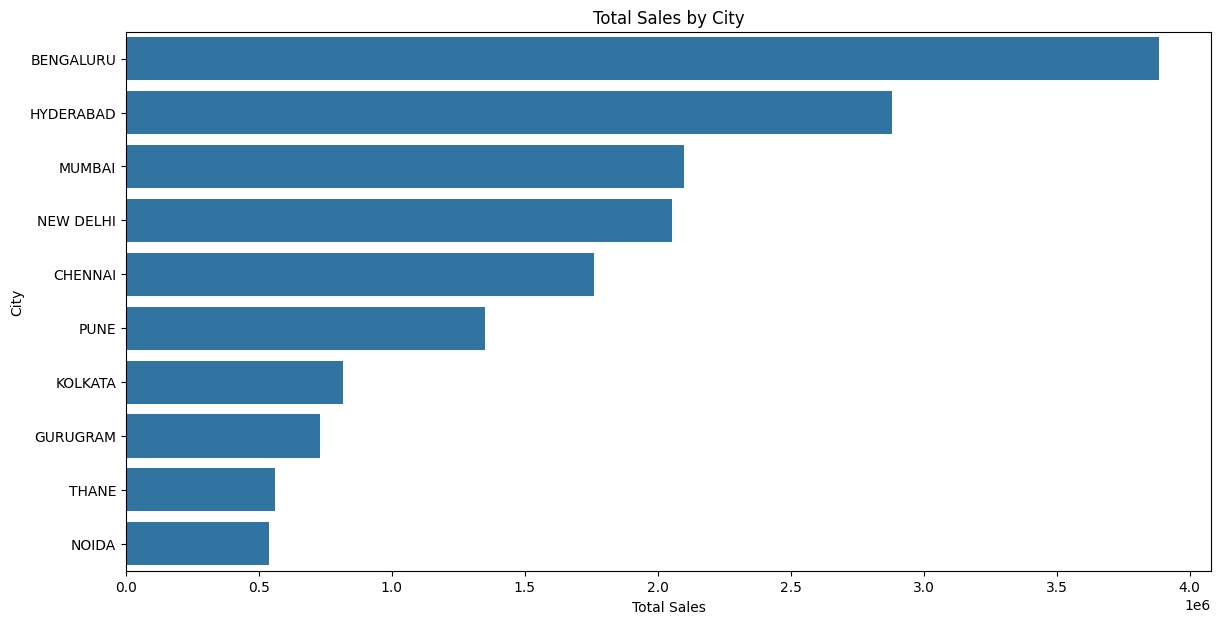

In [76]:
# Plot total sales by state
plt.figure(figsize=(14, 7))
top_cities = city_sales.sort_values('Total Sales', ascending=False).head(10)
sns.barplot(x='Total Sales', y='City', data=top_cities)
plt.title('Total Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

In [77]:
# Number of orders by state
state_orders = data.groupby('ship-state').size().reset_index(name='Number of Orders')
state_orders.head()

,ship-state,Number of Orders
0,ANDAMAN & NICOBAR,142
1,ANDHRA PRADESH,2901
2,AR,1
3,ARUNACHAL PRADESH,73
4,ASSAM,867


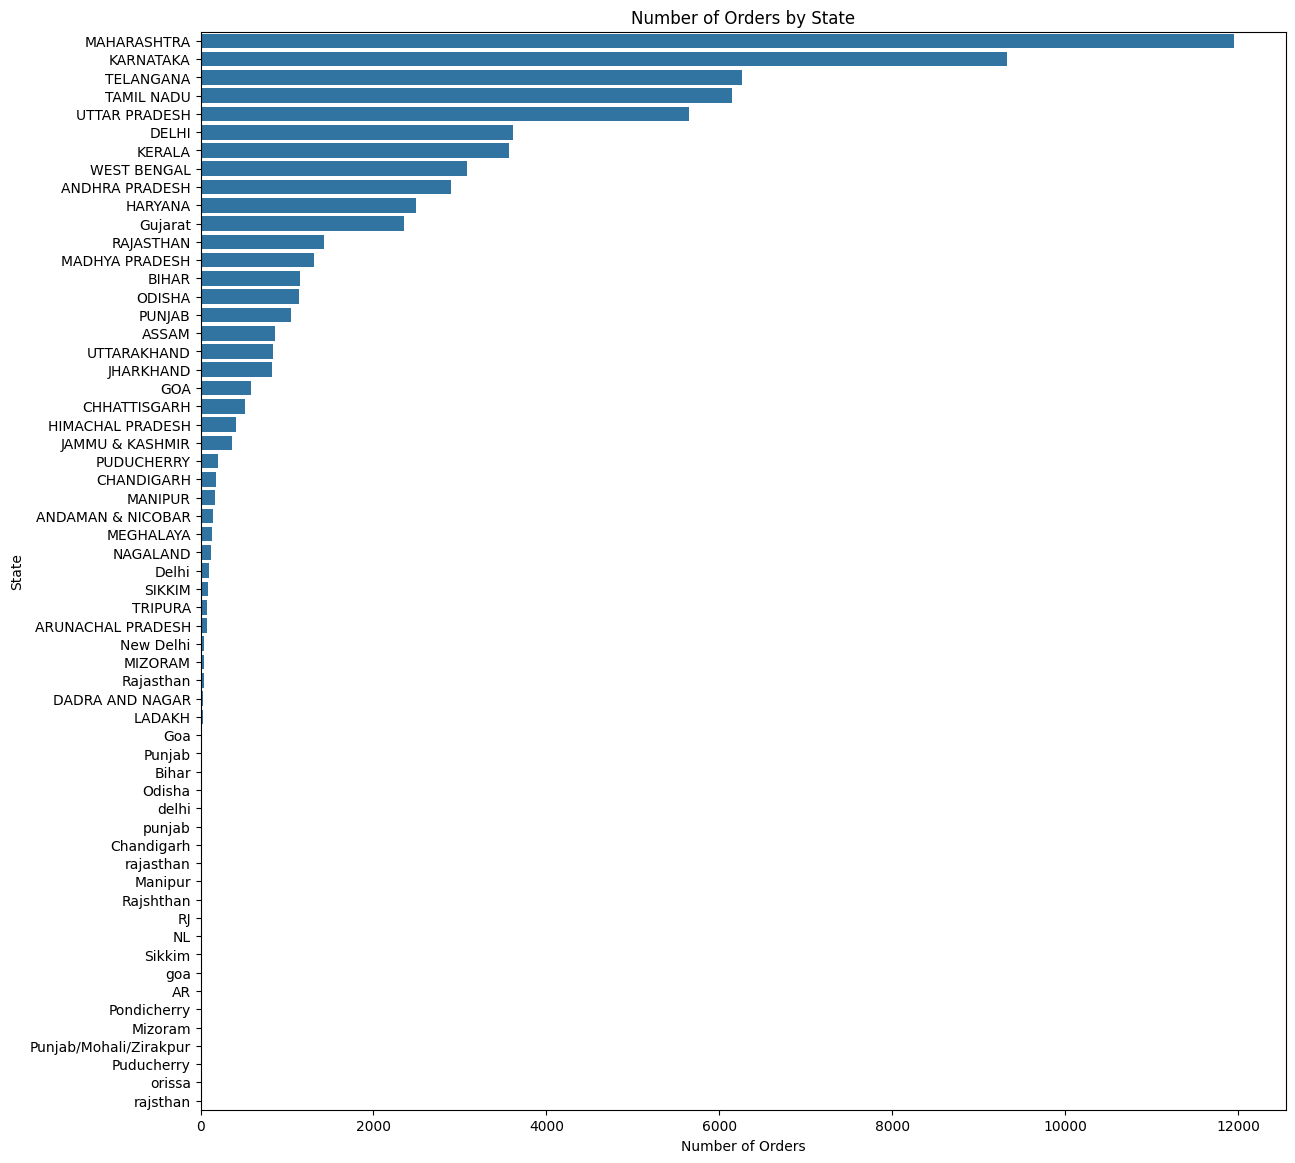

In [78]:
# Plot number of orders by state
plt.figure(figsize=(14, 14))
sns.barplot(x='Number of Orders', y='ship-state', data=state_orders.sort_values('Number of Orders', ascending=False))
plt.title('Number of Orders by State')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.show()

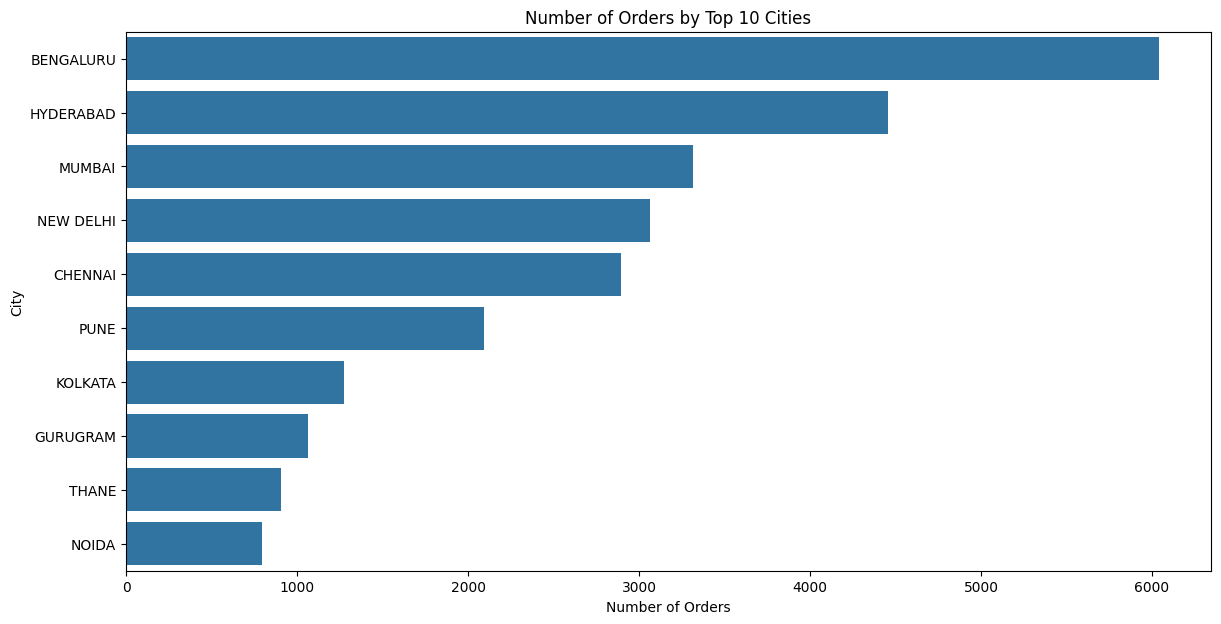

In [79]:
# Number of orders by top 10 cities
city_orders = data.groupby('ship-city').size().reset_index(name='Number of Orders')
top_city_orders = city_orders.sort_values('Number of Orders', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x='Number of Orders', y='ship-city', data=top_city_orders)
plt.title('Number of Orders by Top 10 Cities')
plt.xlabel('Number of Orders')
plt.ylabel('City')
plt.show()

In [80]:
#Business Insights: Provide actionable insights and recommendations based on the analysis to optimize 
#sales strategies, improve customer satisfaction, and enhance overall business performance.

In [81]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'YearMonth'],
      dtype='object')

In [82]:
# Product category distribution
category_distribution = df['Category'].value_counts()
category_sales = df.groupby('Category')['Amount'].sum().reset_index()

In [83]:
category_sales 

,Category,Amount
0,Blazzer,6743046.39
1,Perfume,455492.74
2,Shirt,12084290.30
3,Shoes,72670.24
4,Socks,110982.54
5,T-shirt,22234185.56
6,Trousers,3138770.16
7,Wallet,273286.86
8,Watch,915.00


In [84]:
category_sales.columns = ['Category','Amount of Sales']

In [85]:
category_sales.columns

Index(['Category', 'Amount of Sales'], dtype='object')

In [87]:
category_sales1 = category_sales.sort_values('Amount of Sales',ascending=False)
category_sales1

,Category,Amount of Sales
5,T-shirt,22234185.56
2,Shirt,12084290.30
0,Blazzer,6743046.39
6,Trousers,3138770.16
1,Perfume,455492.74
7,Wallet,273286.86
4,Socks,110982.54
3,Shoes,72670.24
8,Watch,915.00


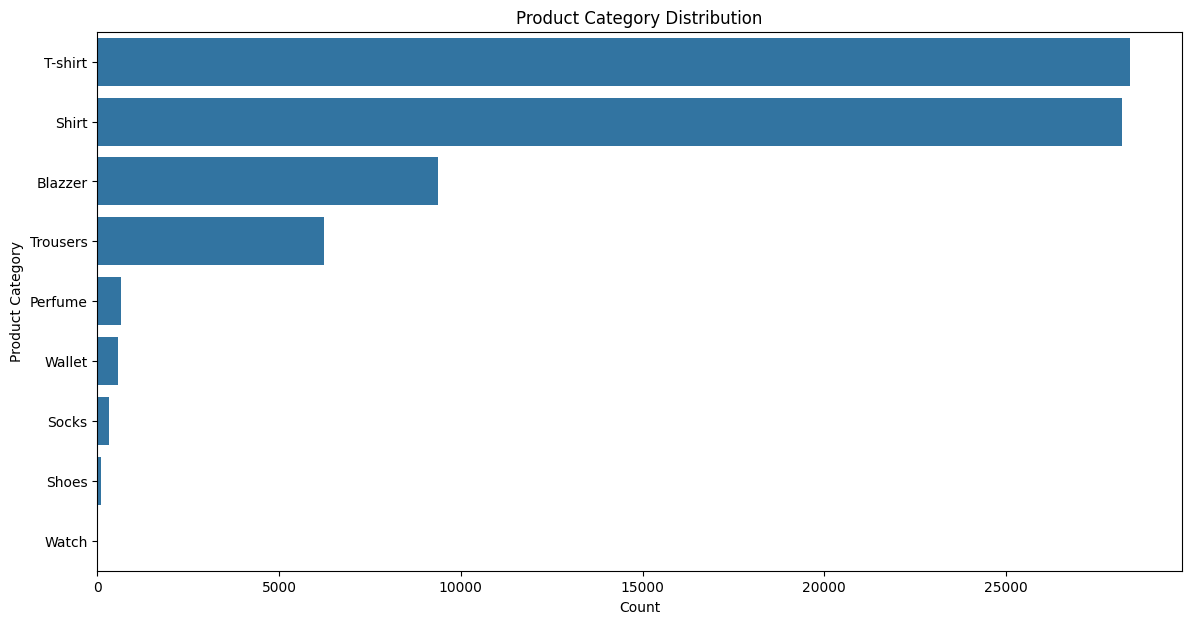

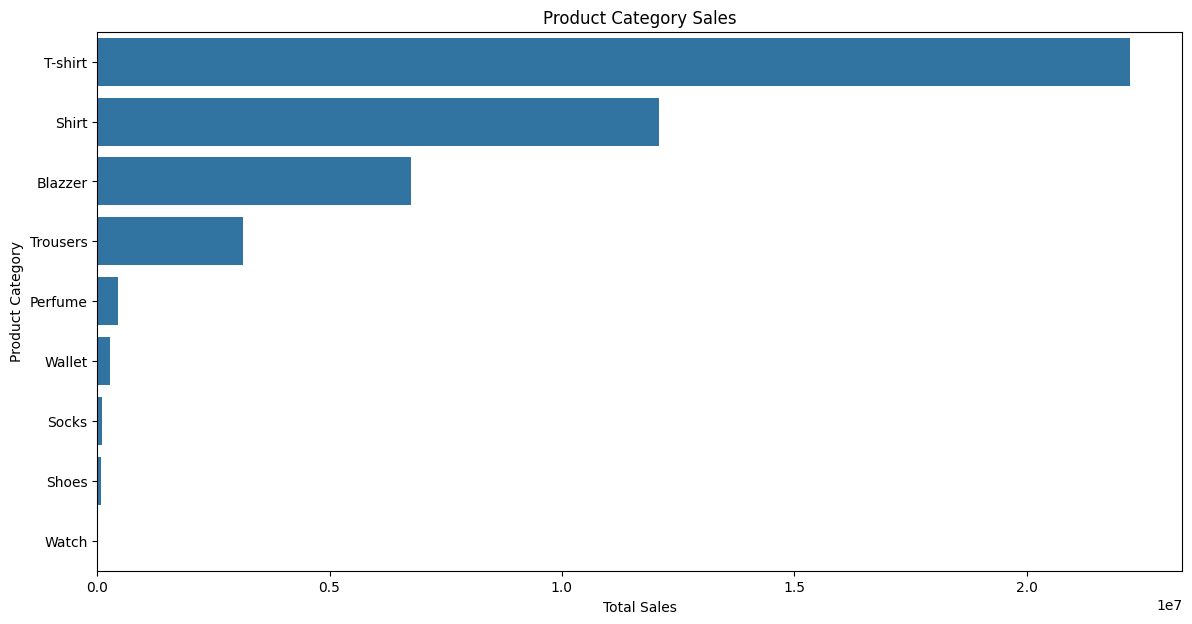

In [88]:
# Plot product category distribution
plt.figure(figsize=(14, 7))
sns.barplot(x=category_distribution.values, y=category_distribution.index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

# Plot product category sales
plt.figure(figsize=(14, 7))
sns.barplot(y='Category', x='Amount of Sales',data=category_sales1)
plt.title('Product Category Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()